In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Nishant\\Machine Learning\\Datasets\\Titanic train data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns

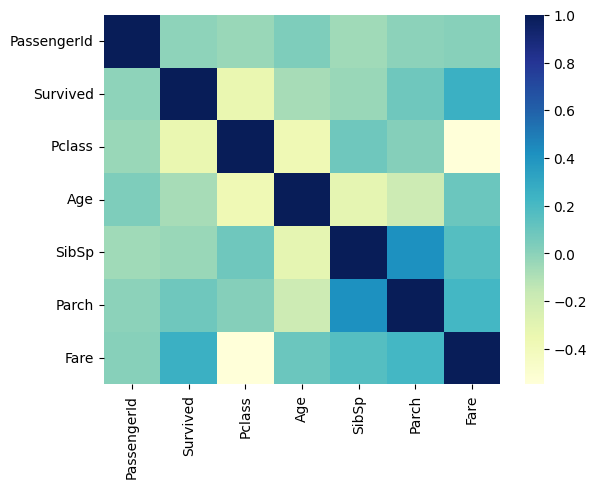

In [4]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [5]:
df1 = df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')
df1.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
dummies = pd.get_dummies(df.Sex).astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
dummies1 = pd.get_dummies(df.Embarked).astype(int)
dummies1.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
df2 = pd.concat([df1,dummies,dummies1],axis='columns')
df2.head() 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [9]:
df2.drop(['Sex','male','Embarked','S'],axis='columns',inplace=True)
df2.head() 

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,0,3,22.0,1,0,7.2500,0,0,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0
4,0,3,35.0,0,0,8.0500,0,0,0


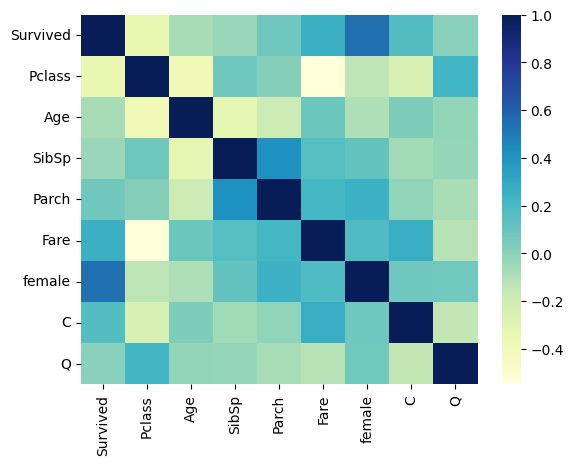

In [10]:
sns.heatmap(df2.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

In [11]:
df2.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
C             0
Q             0
dtype: int64

In [12]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean()) 

In [13]:
df2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
C           0
Q           0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
cont_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'C', 'Q']
df2[cont_cols] = scaler.fit_transform(df2[cont_cols])
df2.head(10) 

,Survived,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,-0.482043,-0.307562
1,1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,2.074505,-0.307562
2,1,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-0.482043,-0.307562
3,1,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-0.482043,-0.307562
4,0,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,-0.482043,-0.307562
5,0,0.827377,0.000000,-0.474545,-0.473674,-0.478116,-0.737695,-0.482043,3.251373
6,0,-1.566107,1.870059,-0.474545,-0.473674,0.395814,-0.737695,-0.482043,-0.307562
7,0,0.827377,-2.131568,2.247470,0.767630,-0.224083,-0.737695,-0.482043,-0.307562
8,1,0.827377,-0.207709,-0.474545,2.008933,-0.424256,1.355574,-0.482043,-0.307562
9,1,-0.369365,-1.208115,0.432793,-0.473674,-0.042956,1.355574,2.074505,-0.307562


In [16]:
X = df2.drop('Survived',axis='columns')
X.head() 

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,-0.482043,-0.307562
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,2.074505,-0.307562
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-0.482043,-0.307562
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-0.482043,-0.307562
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,-0.482043,-0.307562


In [17]:
y = df2['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
len(X_train)

596

In [20]:
from sklearn.svm import SVC
model1 = SVC()

In [21]:
model1.fit(X_train, y_train)

SVC()

In [22]:
model1.score(X_train,y_train)

0.8489932885906041

In [23]:
model1.score(X_test,y_test)

0.8033898305084746

In [24]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=500)

In [25]:
model2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [26]:
model2.score(X_train,y_train) 

0.9865771812080537

In [27]:
model2.score(X_test,y_test)

0.8033898305084746

In [28]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()

In [29]:
model3.fit(X_train,y_train)

LogisticRegression()

In [30]:
model3.score(X_train,y_train)

0.8154362416107382

In [31]:
model3.score(X_test,y_test)

0.7762711864406779

# The Final prediction (on training data) using Random Forest

In [32]:
X_final_train = X
y_final_train = y

In [33]:
model2.fit(X_final_train,y_final_train)

RandomForestClassifier(n_estimators=500)

In [35]:
model2.score(X_final_train,y_final_train)

0.9820426487093153

# Now performing EDA (on testing data) to make prediction 

In [36]:
df = pd.read_csv("C:\\Users\\Nishant\\Machine Learning\\Datasets\\Titanic test data.csv")
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
df1 = df.drop(['PassengerId','Name','Ticket','Cabin'],axis='columns')

In [38]:
dummies = pd.get_dummies(df.Sex).astype(int)

In [39]:
dummies1 = pd.get_dummies(df.Embarked).astype(int)

In [40]:
df2 = pd.concat([df1,dummies,dummies1],axis='columns')

In [41]:
df2.drop(['Sex','male','Embarked','S'],axis='columns',inplace=True)

In [42]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

In [43]:
scaler = StandardScaler()
cont_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'female', 'C', 'Q']
df2[cont_cols] = scaler.fit_transform(df2[cont_cols])
df2.head(10)

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,0.873482,0.334993,-0.499470,-0.400248,-0.497811,-0.755929,-0.568142,2.843757
1,0.873482,1.325530,0.616992,-0.400248,-0.512660,1.322876,-0.568142,-0.351647
2,-0.315819,2.514175,-0.499470,-0.400248,-0.464532,-0.755929,-0.568142,2.843757
3,0.873482,-0.259330,-0.499470,-0.400248,-0.482888,-0.755929,-0.568142,-0.351647
4,0.873482,-0.655545,0.616992,0.619896,-0.417971,1.322876,-0.568142,-0.351647
5,0.873482,-1.289489,-0.499470,-0.400248,-0.472814,-0.755929,-0.568142,-0.351647
6,0.873482,-0.021601,-0.499470,-0.400248,-0.501392,1.322876,-0.568142,2.843757
7,-0.315819,-0.338573,0.616992,0.619896,-0.118681,-0.755929,-0.568142,-0.351647
8,0.873482,-0.972517,-0.499470,-0.400248,-0.508555,1.322876,1.760125,-0.351647
9,0.873482,-0.734788,1.733455,-0.400248,-0.205535,-0.755929,-0.568142,-0.351647


#  The Final prediction (on testing data) using Random Forest

In [49]:
X_final_test = df2

In [50]:
predictions = model2.predict(X_final_test)
print(predictions[:20])   # first 20 predictions

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1]


In [46]:
submission = pd.DataFrame({
    'PassengerId': df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [47]:
check = pd.read_csv('submission.csv')
print(check.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
